In [1]:
using Plots
using LinearAlgebra
using Random
Random.seed!(1234);  # determinism

In [2]:
# Dimensions of tensor
d1, d2, d3 = 4, 8, 7

x1, y1 = randn(d1), randn(d1)
x2, y2 = randn(d2), randn(d2)
x3, y3 = randn(d3), randn(d3)

# Construct tensor A
A = zeros(Float64, d1, d2, d3)
for k = 1:d3; A[:,:,k] .+= x1 * x2' * y3[k]; end
for k = 1:d3; A[:,:,k] .+= x1 * y2' * x3[k]; end
for k = 1:d3; A[:,:,k] .+= y1 * x2' * x3[k]; end

# rank-2 approximation parameterized by n
# (de Silva and Lim, SIMAX 08, Theorem 1.1)
function rank2_approx(n::Float64)
    z1 = (n * x1 + y1)
    z2 = (x2 + y2 / n)
    z3 = (x3 + y3 / n)
    An = zeros(d1, d2, d3)
    for k = 1:d3; An[:,:,k] .+= z1 * z2' * z3[k]; end
    for k = 1:d3; An[:,:,k] .-= n * x1 * x2' * x3[k]; end
    return An
end
;

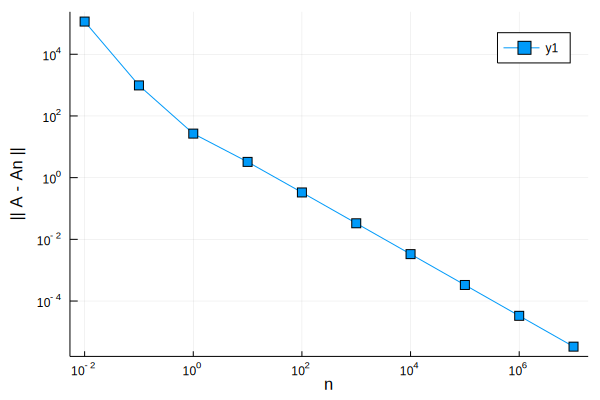

In [3]:
ns = [10.0^(z) for z in -2:7]
Ans = [rank2_approx(n) for n in ns]

plot(ns, [norm(A - An) for An in Ans], marker=:square,
     xlabel = "n", ylabel="|| A - An ||",
     xscale=:log10, yscale=:log10)